In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from numpy import log
from pandas import Series
from datetime import datetime

In [2]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset = pd.read_csv("airline_passengers.csv")

In [4]:
dataset.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
dataset.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [8]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
# Setting Index for Month column
dataset.set_index('Month', inplace=True)

In [10]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
dataset.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


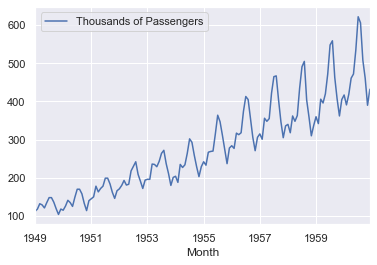

In [12]:
dataset.plot()
plt.show()

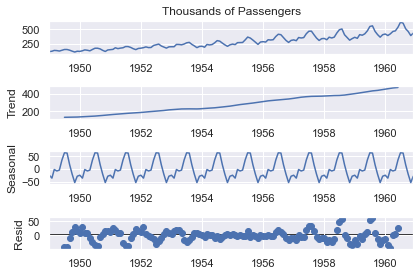

In [13]:
# Decomposition to check dataset pattern/component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'], model='additive', period=12)
decomposition.plot()
plt.show()

In [14]:
# Check whether autocorrelation there in the dataset or not ?
# Positive Autocorrelation found

import statsmodels.api as sm
sm.stats.durbin_watson(dataset['Thousands of Passengers'])

0.0121527966037621

# Check whether time series is stationary or not - Mandatory steps

# How to check - Augmented Dickey Fuller Test

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [17]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("***************Augmented Dickey Fuller Test***************")
    labels = ['ADF Stats Test','p-value','#Lags','No. of obs']

    for a, b in zip(result, labels):
        print(b + " : "+ str(a))

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries is Non-Stationary")

In [18]:
adf_check(dataset['Thousands of Passengers'])

***************Augmented Dickey Fuller Test***************
ADF Stats Test : 0.8153688792060423
p-value : 0.9918802434376409
#Lags : 13
No. of obs : 130
Week evidence against null hypothesis and my timeseries is Non-Stationary


In [19]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [20]:
#dataset.head(10)

In [21]:
adf_check(dataset['1st Diff'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -2.8292668241699874
p-value : 0.05421329028382711
#Lags : 12
No. of obs : 130
Week evidence against null hypothesis and my timeseries is Non-Stationary


In [22]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [23]:
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [24]:
adf_check(dataset['2nd Diff'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -16.384231542468513
p-value : 2.7328918500142026e-29
#Lags : 11
No. of obs : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [25]:
# Trend  (p, d, q)
# Seasonality (P, D, Q)

# Trend
# d = 2

In [26]:
# Seasonality
dataset['seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [27]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [28]:
adf_check(dataset['seasonality'].dropna())

***************Augmented Dickey Fuller Test***************
ADF Stats Test : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No. of obs : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [29]:
# Trend  (p, d, q)
# Seasonality (P, D, Q)

# Trend
# d = 2
# D = 1

# p = ?
# P = ?
# q = ?
# Q = ?

# AR I MA Model

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [31]:
# Trend
# d = 2
# p = 4
# q = 2

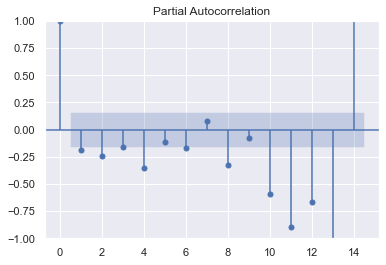

In [32]:
plot_pacf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

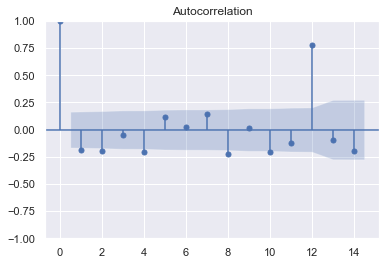

In [33]:
plot_acf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

In [34]:
# Trend
# d = 2
# p = 4
# q = 2

# Seasonality
# D = 1
# P = 2
# Q = 5


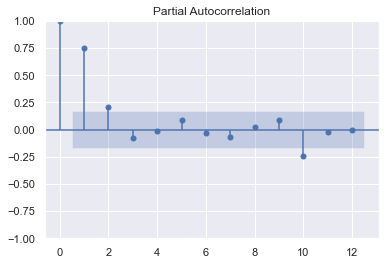

In [35]:
plot_pacf(dataset['seasonality'].dropna(), lags=12)
plt.show()

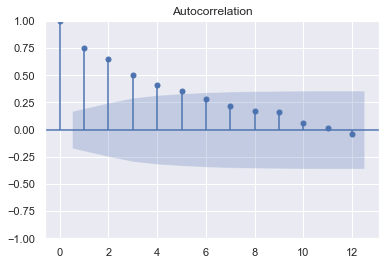

In [36]:
plot_acf(dataset['seasonality'].dropna(), lags=12)
plt.show()

In [37]:
# Trend
# d = 2
# p = 4
# q = 2

# Seasonality
# D = 1
# P = 2
# Q = 5

In [38]:
dataset.head(2)

,Thousands of Passengers,1st Diff,2nd Diff,seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN


# ARIMA Model

In [39]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [40]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                             order =(4,2,2), seasonal_order=(2,1,1,12))

result = model.fit()
print(result.summary())

C:\Users\Tarunn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Tarunn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.782
Date:                              Wed, 27 Mar 2024   AIC                           1015.565
Time:                                      12:21:47   BIC                           1044.240
Sample:                                  01-01-1949   HQIC                          1027.216
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3590      0.097    -14.027      0.000      -1.549      -1.169
ar.L2         -0.49

C:\Users\Tarunn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
# SARIMAX(4, 2, 2)x(2, 1, 5, 12) : AIC - 1021.460
# SARIMAX(4, 2, 2)x(2, 1, 4, 12) : AIC - 1020.041
# SARIMAX(4, 2, 2)x(2, 1, 3, 12) : AIC - 1018.523
# SARIMAX(4, 2, 2)x(2, 1, 2, 12) : AIC - 1017.565
# SARIMAX(4, 2, 2)x(2, 1, 1, 12) : AIC - 1015.567 # this is the best basis manual approach

In [42]:
len(dataset)

144

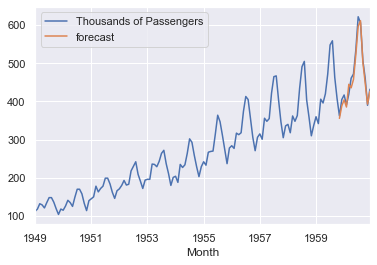

In [43]:
# forecast with the existing data before prediction the future time
dataset['forecast'] = result.predict(start=130, end = 144, dynamic=True)
dataset[['Thousands of Passengers','forecast']].plot()
plt.show()

In [44]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,611.514274
1960-09-01,508,-98.0,-82.0,45.0,503.452046
1960-10-01,461,-47.0,51.0,54.0,448.459193
1960-11-01,390,-71.0,-24.0,28.0,393.192388
1960-12-01,432,42.0,113.0,27.0,426.483943


In [45]:
from pandas.tseries.offsets import DateOffset

In [46]:
future_dates = [dataset.index[-1] + DateOffset(months=x) for x in range(61)]

In [47]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [48]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=dataset.columns)

In [49]:
future_dates_df

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [50]:
# concatnate the both table (original table - dataset and forecast table - future_dates_df)

future_df = pd.concat([dataset, future_dates_df])

In [51]:
future_df.head()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [52]:
future_df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [53]:
len(future_df)

204

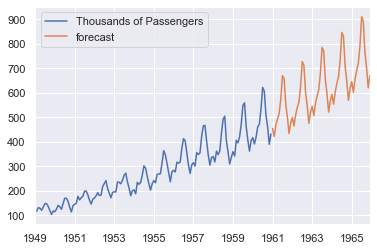

In [54]:
future_df['forecast'] = result.predict(start=144, end=204, dynamic=True)
future_df[['Thousands of Passengers','forecast']].plot()
plt.show()

In [55]:
future_df.tail(60)

,Thousands of Passengers,1st Diff,2nd Diff,seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,454.079686
1961-02-01,NaN,NaN,NaN,NaN,421.795574
1961-03-01,NaN,NaN,NaN,NaN,469.974409
1961-04-01,NaN,NaN,NaN,NaN,492.204943
1961-05-01,NaN,NaN,NaN,NaN,515.953769
1961-06-01,NaN,NaN,NaN,NaN,574.223787
1961-07-01,NaN,NaN,NaN,NaN,669.656796
1961-08-01,NaN,NaN,NaN,NaN,657.140520
1961-09-01,NaN,NaN,NaN,NaN,554.735210
1961-10-01,NaN,NaN,NaN,NaN,499.208495


In [56]:
#future_df.to_csv("Final_Airline_passengers_details_for_5Years.csv")